#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №8

## №3.

Рассматривается следующая параметрическая модель: $X_1,\dots,X_N$ — выборка из распределения $N(\theta, 1)$. Известно, что $\theta$ близко к нулю: с вероятностью не менее $0.95$ выполнено неравенство $|\theta| < 0.5$.

Сгенерируйте выборку размера $100$ из распределения Коши с нулевым параметром сдвига и с параметром масштаба, равным $1$. При $N = 100$ используйте эту выборку в качестве $X_1,\dots, X_N$ для описанной выше модели. Посчитайте байесовские оценки (для одного априорного распределения, учитывающего описанное выше свойство распределения параметра $\theta$) и оценки максимального правдоподобия для всех $n\leq100$. Постройте графики абсолютной величины отклонения этих оценок от истинного значения параметра $\theta_0 = 0$ в зависимости от $n$. Сделайте выводы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy

%matplotlib inline

In [2]:
# Генерируем выборку из распределения Коши.
N = 100
sample = cauchy.rvs(size=N)

### Параметры априорного распределения $N(\mu, \sigma^2)$ 
Очевидно, $\mu = 0$. Найдем $\sigma^2$ (сделаем для $P(|\theta| < 0.5) = 0.95$).

Неравенство Чебышева:

$P(|\theta|\geq0.5)\leq\frac{D\theta}{0.5^2}=\frac{\sigma^2}{0.25}$

$P(|\theta|<0.5) = 1 - P(|\theta|\geq0.5)\geq1-\frac{\sigma^2}{0.25}$

$\frac{\sigma^2}{0.25}\geq1-P(|\theta|<0.5) = 0.05$

Возьмем $\sigma^2 = 0.0125$.

Байесовская оценка: $\theta^* = \left(\frac{\mu}{\sigma^2} + \sum_{i=1}^{n}X_i\right) / \left(\frac{1}{\sigma^2} + n\right) = \frac{\sum_{i=1}^{n}X_i}{\frac{1}{\sigma^2} + n}$.

In [3]:
# Оценка максимального правдоподобия.
likehood = np.array([np.mean(sample[:n]) for n in range(1, N + 1, 1)])

# Байесовская оценка с априорным распределением N(0,0.0125).
sigma = 0.0125
bayes = np.array([
                (np.mean(sample[:n]) * n)/ (n + (1 / sigma))
                for n in range(1, N + 1, 1)
            ]) 

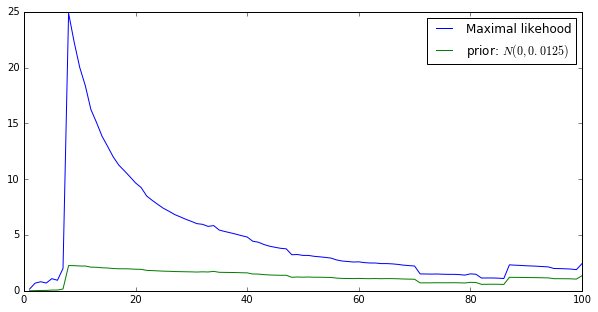

In [4]:
theta_0 = 0

# Графики абсолютных отклонений значений оценок от истинного значения.
grid = np.linspace(1, N, N)
plt.figure(figsize=(10, 5))
plt.plot(grid, abs(likehood - theta_0), label='Maximal likehood')
plt.plot(grid, abs(bayes - theta_0), label=(r'prior: $N(0, 0.0125)$'))

plt.legend()
plt.show()

# Вывод

Выбор подходящих параметров для сопряженного априорного распределения позволил получить хорошую байесовскую оценку параметра $\theta$. График показывает, что она лучше оценки по методу максимального правдоподобия в смысле абсолютного значения отклонения от истинного значения. 

Параметры сопряженного распределения $N(\mu, \sigma_0^2)$ можно интерпретировать так: если значение $\sigma_0^2$ достаточно велико относительно $\sigma^2$ (последнее равно 1 в нашем случае), то это значит, что мы меньше опираемся на априорное распределение и больше — на выборку и, следовательно, математическое ожидание апостериорного распределения будет ближе к математическому ожиданию выборки. В противном случае (а у нас так и получилось) — математическое ожидание будет ближе к $\mu$ (мы в большей степени учитываем априорное распределение).
(https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter9.pdf стр. 8-9)